In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

housing = pd.read_csv('Housing.csv')

binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[binary_vars] = housing[binary_vars].apply(lambda x: x.map({'yes': 1, 'no': 0}))

furnishing_status = pd.get_dummies(housing['furnishingstatus'], drop_first=True, dtype=int)
housing = pd.concat([housing, furnishing_status], axis=1)
housing.drop(['furnishingstatus'], axis=1, inplace=True)

scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
housing[num_vars] = scaler.fit_transform(housing[num_vars])
print("Processed Data Head:")
print(housing.head())

Processed Data Head:
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667         1          0   
1  0.909091  0.502405       0.6   1.000000  1.000000         1          0   
2  0.909091  0.571134       0.4   0.333333  0.333333         1          0   
3  0.906061  0.402062       0.6   0.333333  0.333333         1          0   
4  0.836364  0.396564       0.6   0.000000  0.333333         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  0.666667         1   
1         0                0                1  1.000000         0   
2         1                0                0  0.666667         1   
3         1                0                1  1.000000         1   
4         1                0                1  0.666667         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2 

In [ ]:
from sklearn.model_selection import train_test_split

y = housing.pop('price')
X = housing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size:  {X_test.shape[0]} samples")


Training set size: 436 samples
Testing set size:  109 samples


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression model has been successfully trained.")

Linear Regression model has been successfully trained.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"R-squared (R2 Score):      {r2:.4f}")

--- Model Evaluation Results ---
Mean Absolute Error (MAE): 0.0680
Mean Squared Error (MSE):  0.0084
R-squared (R2 Score):      0.6807


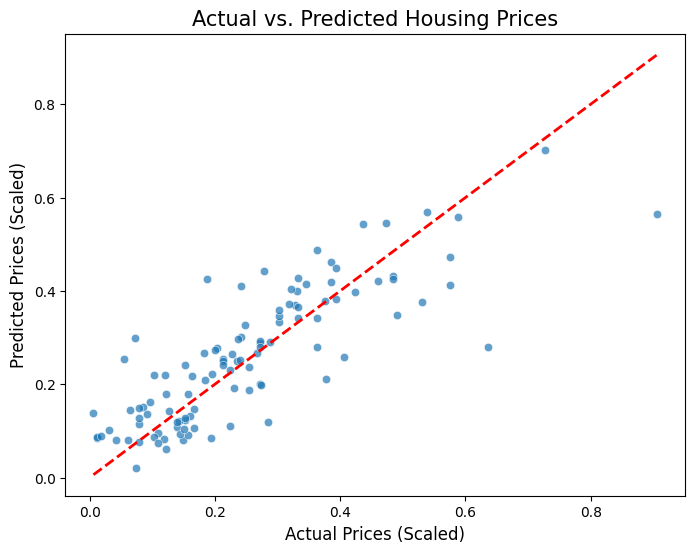

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Actual vs. Predicted Housing Prices', fontsize=15)
plt.xlabel('Actual Prices (Scaled)', fontsize=12)
plt.ylabel('Predicted Prices (Scaled)', fontsize=12)
plt.show()

In [ ]:

coeff_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])

print("--- Model Coefficients ---")
print(f"Intercept: {lr_model.intercept_:.4f}\n")
print(coeff_df)

--- Model Coefficients ---
Intercept: 0.0224

                 Coefficient
area                0.306699
bedrooms            0.039274
bathrooms           0.295439
stories             0.105427
mainroad            0.049794
guestroom           0.033324
basement            0.024047
hotwaterheating     0.073407
airconditioning     0.073167
parking             0.062824
prefarea            0.052335
semi-furnished     -0.008829
unfurnished        -0.036987
